**Authors:** Isaac Tabor and Kimberly Liu

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and  𝑘 NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:

In [1]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The y_test and y_train vectors, for each index i, tell you want number is written in the corresponding index in X_train[i] and X_test[i]. The value of X_train[i] and X_test[i], however, is a 28 × 28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

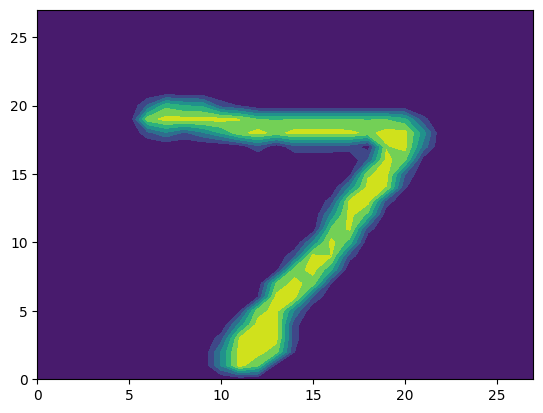

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

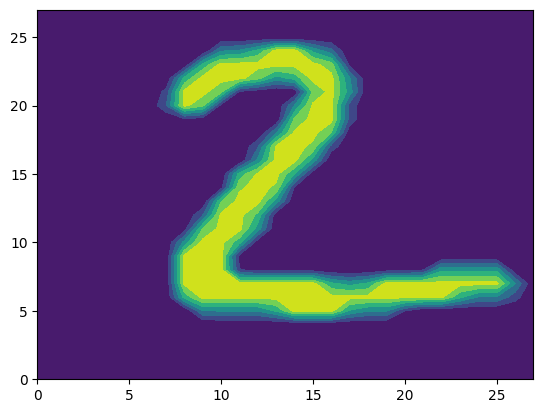

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

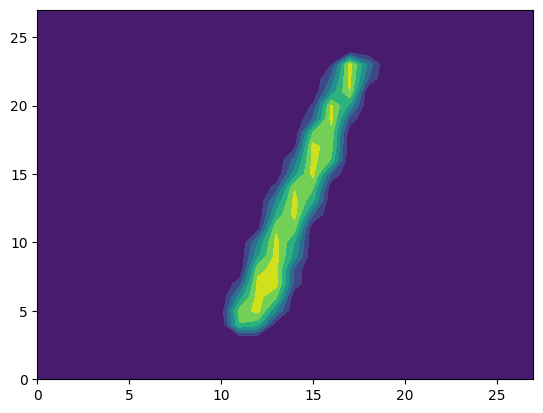

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

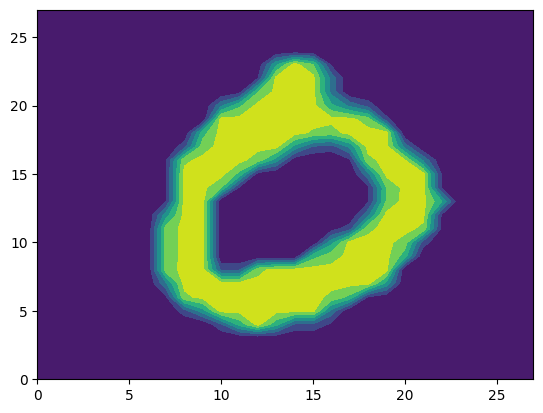

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

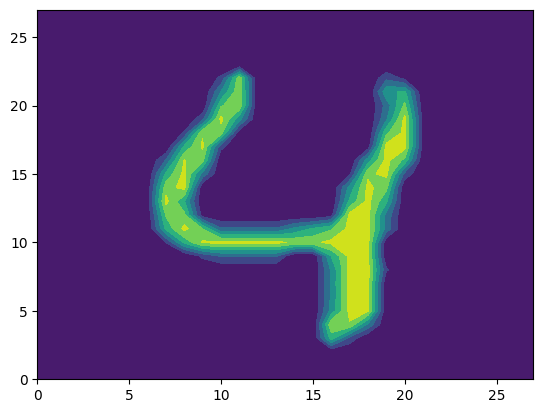

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

 # Used ChatGPT to help me do this

OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [9]:
# Checking the shapes of X_train, X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)


In [7]:
# Checking the shape of each sample in X_train
for i in range(len(X_train)):
    print(f"Shape of X_train[{i}]:", X_train[i].shape)

Streaming output truncated to the last 5000 lines.
Shape of X_train[55000]: (28, 28)
Shape of X_train[55001]: (28, 28)
Shape of X_train[55002]: (28, 28)
Shape of X_train[55003]: (28, 28)
Shape of X_train[55004]: (28, 28)
Shape of X_train[55005]: (28, 28)
Shape of X_train[55006]: (28, 28)
Shape of X_train[55007]: (28, 28)
Shape of X_train[55008]: (28, 28)
Shape of X_train[55009]: (28, 28)
Shape of X_train[55010]: (28, 28)
Shape of X_train[55011]: (28, 28)
Shape of X_train[55012]: (28, 28)
Shape of X_train[55013]: (28, 28)
Shape of X_train[55014]: (28, 28)
Shape of X_train[55015]: (28, 28)
Shape of X_train[55016]: (28, 28)
Shape of X_train[55017]: (28, 28)
Shape of X_train[55018]: (28, 28)
Shape of X_train[55019]: (28, 28)
Shape of X_train[55020]: (28, 28)
Shape of X_train[55021]: (28, 28)
Shape of X_train[55022]: (28, 28)
Shape of X_train[55023]: (28, 28)
Shape of X_train[55024]: (28, 28)
Shape of X_train[55025]: (28, 28)
Shape of X_train[55026]: (28, 28)
Shape of X_train[55027]: (28, 2

In [8]:
# Checking the shape of each sample in X_train

for i in range(len(X_test)):
    print(f"Shape of X_test[{i}]:", X_test[i].shape)

Shape of X_test[0]: (28, 28)
Shape of X_test[1]: (28, 28)
Shape of X_test[2]: (28, 28)
Shape of X_test[3]: (28, 28)
Shape of X_test[4]: (28, 28)
Shape of X_test[5]: (28, 28)
Shape of X_test[6]: (28, 28)
Shape of X_test[7]: (28, 28)
Shape of X_test[8]: (28, 28)
Shape of X_test[9]: (28, 28)
Shape of X_test[10]: (28, 28)
Shape of X_test[11]: (28, 28)
Shape of X_test[12]: (28, 28)
Shape of X_test[13]: (28, 28)
Shape of X_test[14]: (28, 28)
Shape of X_test[15]: (28, 28)
Shape of X_test[16]: (28, 28)
Shape of X_test[17]: (28, 28)
Shape of X_test[18]: (28, 28)
Shape of X_test[19]: (28, 28)
Shape of X_test[20]: (28, 28)
Shape of X_test[21]: (28, 28)
Shape of X_test[22]: (28, 28)
Shape of X_test[23]: (28, 28)
Shape of X_test[24]: (28, 28)
Shape of X_test[25]: (28, 28)
Shape of X_test[26]: (28, 28)
Shape of X_test[27]: (28, 28)
Shape of X_test[28]: (28, 28)
Shape of X_test[29]: (28, 28)
Shape of X_test[30]: (28, 28)
Shape of X_test[31]: (28, 28)
Shape of X_test[32]: (28, 28)
Shape of X_test[33]:

In [10]:
# Checking the shapes of y_train, and y_test
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (60000,)
Shape of y_test: (10000,)




*   Shape of X_train: (60000, 28, 28).
  - That is, 60,000 training samples with 28x28 grayscale images.
*   Shape of X_test: (10000, 28, 28).
  - That is, 10,000 training samples with 28x28 grayscale images.
*   Shape of X_train[i] and X_test[i] for each index i?: (28, 28).
  - That is, each image is 28 by 28.
*   Shape of y_train: (60000,).
  - That is, 60,000 labels (one per training image)
*   Shape of y_test: (10000,).
  - That is, 10,000 labels (one per test image).






3. Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the  𝑖𝑛𝑑𝑒𝑥 -th element of X_test into a  28×28=784 -length row vector of values, rather than a matrix. Turn X_train into an  𝑁×784  matrix  𝑋  that is suitable for scikit-learn's kNN classifier where  𝑁  is the number of observations and  784=28∗28  (you could use, for example, a for loop).

In [11]:
# Converting the 28x28 image matrices to 1D vectors because that is the format scikit-learn's KNN classifier requires.

import numpy as np

# Reshaping X_train and X_test into vectors
X_train = np.array([X_train[i].reshape((1, 784)) for i in range(len(X_train))]).reshape(len(X_train), 784)
X_test = np.array([X_test[i].reshape((1, 784)) for i in range(len(X_test))]).reshape(len(X_test), 784)

 # Used ChatGPT to help me do this

# Checking the shapes after transformation
print("Shape of X_train (reshaped):", X_train.shape)
print("Shape of X_test (reshaped):", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train (reshaped): (60000, 784)
Shape of X_test (reshaped): (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


4. Use the reshaped X_test and y_test data to create a  𝑘 -nearest neighbor classifier of digit. What is the optimal number of neighbors  𝑘 ? If you can't determine this, play around with different values of  𝑘  for your classifier.

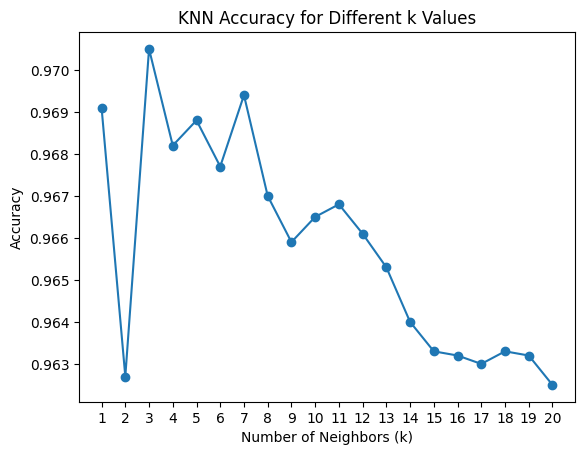

The optimal value of k is: 3


In [16]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate KNN for different k values
k_values = range(1, 21)  # You can adjust this range as needed
accuracies = []

# Loop over different k values
for k in k_values:
    # Create the KNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(X_train, y_train)  # Assuming you have X_train and y_train

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy for different k values
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

# Identify the optimal k
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"The optimal value of k is: {optimal_k}")

 # Used ChatGPT to help me do this

5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.

Accuracy on the test set: 0.9705


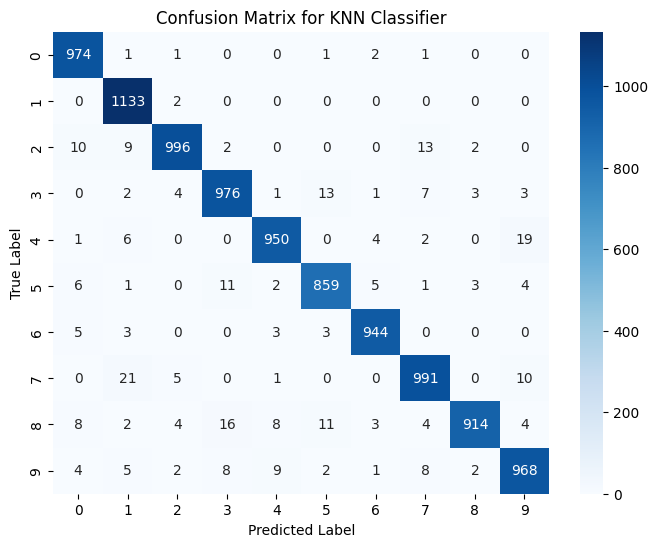


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Train the KNN classifier with the optimal k (from previous analysis)
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Make predictions on the test set
y_pred_test = knn_optimal.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

 # Used ChatGPT to help me do this


**Findings:**

*   The model has a high accuracy (97.05%).
*   The diagonal confirms the high accuracy because the predicted and actual values are matching.





6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

*   The most common error is predicting 1 for 7, which makes sense.
*   The second most common is predicting 9 for 4.
*   Predicting 3 for 8 is also common.
*   All of the above kind of make sense, and are common errors humans could make, which is an interesting pattern.






7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)


*   You could add another dimension for color.
*   The matrix would then be height x width x 3.
*   Tabular data:


| Pixel # | R   | G   | B   |
|---------|-----|-----|-----|
| 1       | 255 | 0   | 0   |
| 2       | 0   | 255 | 0   |
| 3       | 0   | 0   | 255 |
| 4       | 255 | 255 | 0   |
| 5       | 255 | 0   | 255 |
| 6       | 0   | 255 | 255 |
| 7       | 128 | 128 | 128 |
| 8       | 255 | 255 | 255 |
| 9       | 0   | 0   | 0   |

* Used Chat to help me with this


